<a href="https://colab.research.google.com/github/moyu07/EDGE-Project/blob/main/ML_batch_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

day-01

In [26]:
import pandas as pd

try:
  df = pd.read_csv('/content/online_furniture_retailer.csv')
except FileNotFoundError:
  # If not found in /content, try a common alternative path
  df = pd.read_csv('/content/online_furniture_retailer.csv')

display(df.head())

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
0,Outdoor,Patio Set,World Market,Failed Delivery,True,Credit Card,93810,2824,191.27,45.63,86.82,323.72,11,3.2
1,Living Room,Sofa,West Elm,Cancelled,True,Apple Pay,13278,5506,702.87,52.65,183.07,938.59,10,4.5
2,Dining Room,Bar Stool,Ashley Furniture,Delivered,False,Cash on Delivery,42098,4657,395.41,96.79,0.00,492.20,2,NaN
3,Dining Room,China Cabinet,HomeGoods,Pending,False,Google Pay,28289,2679,602.59,0.00,0.00,602.59,9,NaN
4,Dining Room,China Cabinet,CB2,Pending,True,Apple Pay,98696,9935,1782.36,69.23,41.53,1893.12,13,1.3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category            1938 non-null   object 
 1   product_subcategory         1938 non-null   object 
 2   brand                       1842 non-null   object 
 3   delivery_status             1938 non-null   object 
 4   assembly_service_requested  1938 non-null   bool   
 5   payment_method              1938 non-null   object 
 6   order_id                    1938 non-null   int64  
 7   customer_id                 1938 non-null   int64  
 8   product_price               1938 non-null   float64
 9   shipping_cost               1880 non-null   float64
 10  assembly_cost               1900 non-null   float64
 11  total_amount                1938 non-null   float64
 12  delivery_window_days        1938 non-null   int64  
 13  customer_rating             1658 

In [28]:
# Access the trained regressor model from the pipeline
trained_model = model_pipeline.named_steps['regressor']

# Access the preprocessor to get the feature names after one-hot encoding
preprocessor = model_pipeline.named_steps['preprocessor']

# Fit the model pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Get the feature names after preprocessing
# Numerical features remain the same
numerical_features_after_preprocessing = numerical_cols
# Categorical features get one-hot encoded
categorical_features_after_preprocessing = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the feature names
all_features = list(numerical_features_after_preprocessing) + list(categorical_features_after_preprocessing)

# Get feature importances
# Since Linear Regression doesn't have feature_importances_, we can't directly get them.
# If you used a model that supports feature importances (like RandomForestRegressor),
# you would access them like this:
# feature_importances = trained_model.feature_importances_

# For Linear Regression, you can look at the coefficients as a proxy for feature importance,
# but they are not directly comparable across features due to different scales.
# Let's display the coefficients instead.
feature_importances = trained_model.coef_

# Create a pandas Series for better visualization
# Note: For Linear Regression coefficients, the interpretation is different from feature importances.
feature_importance_series = pd.Series(feature_importances, index=all_features)

# Sort feature importances (coefficients) in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print or display the sorted feature importances (coefficients)
print("Feature Coefficients (as a proxy for importance):")
display(sorted_feature_importance)

Feature Coefficients (as a proxy for importance):


,0
product_price,656.822920
assembly_cost,78.227748
shipping_cost,47.620513
product_subcategory_Bar Stool,5.797364
assembly_service_requested_True,3.629820
...,...
product_subcategory_Side Table,-2.511687
brand_World Market,-3.009380
product_subcategory_Dining Chair,-3.550747
assembly_service_requested_False,-3.629820


In [29]:
import pandas as pd

try:
  df = pd.read_csv('/content/online_furniture_retailer.csv')
except FileNotFoundError:
  print("File not found. Please upload 'online_furniture_retailer.csv' or provide the correct path.")
  df = None # Set df to None to avoid NameError later

if df is not None:
  display(df.head())

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
0,Outdoor,Patio Set,World Market,Failed Delivery,True,Credit Card,93810,2824,191.27,45.63,86.82,323.72,11,3.2
1,Living Room,Sofa,West Elm,Cancelled,True,Apple Pay,13278,5506,702.87,52.65,183.07,938.59,10,4.5
2,Dining Room,Bar Stool,Ashley Furniture,Delivered,False,Cash on Delivery,42098,4657,395.41,96.79,0.00,492.20,2,NaN
3,Dining Room,China Cabinet,HomeGoods,Pending,False,Google Pay,28289,2679,602.59,0.00,0.00,602.59,9,NaN
4,Dining Room,China Cabinet,CB2,Pending,True,Apple Pay,98696,9935,1782.36,69.23,41.53,1893.12,13,1.3


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Define features and target based on the online furniture retailer dataset
target = 'total_amount'
numerical_cols = ['product_price', 'shipping_cost', 'assembly_cost', 'delivery_window_days', 'customer_rating']
categorical_cols = ['product_category', 'product_subcategory', 'brand', 'delivery_status', 'assembly_service_requested', 'payment_method']


features = numerical_cols + categorical_cols
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and a Linear Regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")

R-squared score: 0.9997048458283971


In [31]:
# Access the trained regressor model from the pipeline
trained_model = model_pipeline.named_steps['regressor']

# Access the preprocessor to get the feature names after one-hot encoding
preprocessor = model_pipeline.named_steps['preprocessor']

# Fit the model pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Get the feature names after preprocessing
# Numerical features remain the same
numerical_features_after_preprocessing = numerical_cols
# Categorical features get one-hot encoded
categorical_features_after_preprocessing = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the feature names
all_features = list(numerical_features_after_preprocessing) + list(categorical_features_after_preprocessing)

# Get feature importances
# Since Linear Regression doesn't have feature_importances_, we can't directly get them.
# If you used a model that supports feature importances (like RandomForestRegressor),
# you would access them like this:
# feature_importances = trained_model.feature_importances_

# For Linear Regression, you can look at the coefficients as a proxy for feature importance,
# but they are not directly comparable across features due to different scales.
# Let's display the coefficients instead.
feature_importances = trained_model.coef_

# Create a pandas Series for better visualization
# Note: For Linear Regression coefficients, the interpretation is different from feature importances.
feature_importance_series = pd.Series(feature_importances, index=all_features)

# Sort feature importances (coefficients) in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print or display the sorted feature importances (coefficients)
print("Feature Coefficients (as a proxy for importance):")
display(sorted_feature_importance)

Feature Coefficients (as a proxy for importance):


,0
product_price,656.822920
assembly_cost,78.227748
shipping_cost,47.620513
product_subcategory_Bar Stool,5.797364
assembly_service_requested_True,3.629820
...,...
product_subcategory_Side Table,-2.511687
brand_World Market,-3.009380
product_subcategory_Dining Chair,-3.550747
assembly_service_requested_False,-3.629820


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Define features and target based on the online furniture retailer dataset
target = 'total_amount'
numerical_cols = ['product_price', 'shipping_cost', 'assembly_cost', 'delivery_window_days', 'customer_rating']
categorical_cols = ['product_category', 'product_subcategory', 'brand', 'delivery_status', 'assembly_service_requested', 'payment_method']


features = numerical_cols + categorical_cols
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and a Linear Regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")

R-squared score: 0.9997048458283971


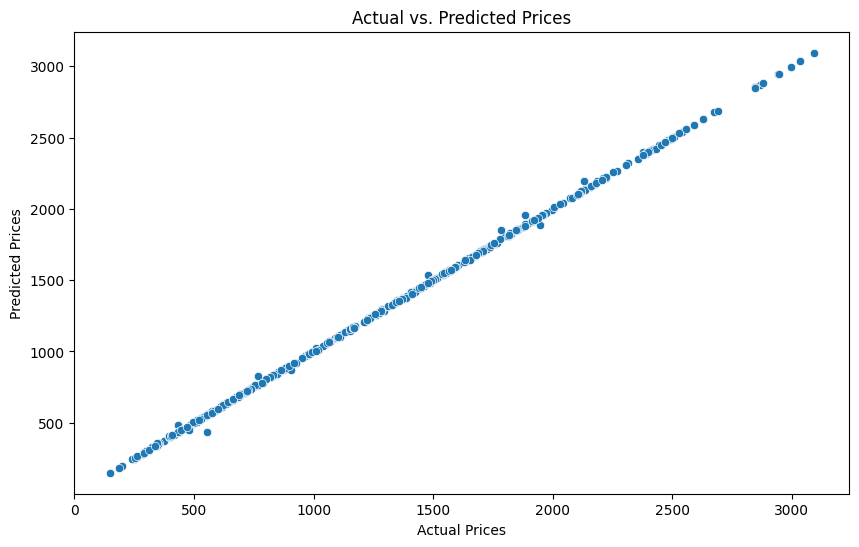

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [20]:
# Print the R-squared score
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 1.00


In [21]:
from sklearn.metrics import mean_squared_error as mse

# Preprocess X_train using the same preprocessor from the pipeline
X_train_processed = model_pipeline.named_steps['preprocessor'].transform(X_train)

# Make predictions using the preprocessed training data
predicted = model_pipeline.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE)
error = mse(y_train,predicted) ** .5
print(f"RMSE on Training Data: {error:.2f}")

RMSE on Training Data: 15.61


In [34]:
from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model_list=[RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression()]
error={}

# Preprocess the training and testing data using the preprocessor from the existing pipeline
preprocessor = model_pipeline.named_steps['preprocessor']
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


for model in model_list:
  # Train the model on the preprocessed training data
  model.fit(X_train_processed,y_train)
  # Get the model name correctly
  name=type(model).__name__
  # Score the model on the preprocessed testing data
  score=model.score(X_test_processed,y_test)*100
  error[name]=score

print(error)

{'RandomForestRegressor': 99.68713010839522, 'DecisionTreeRegressor': 99.26193055554452, 'LinearRegression': 99.97048458283972}


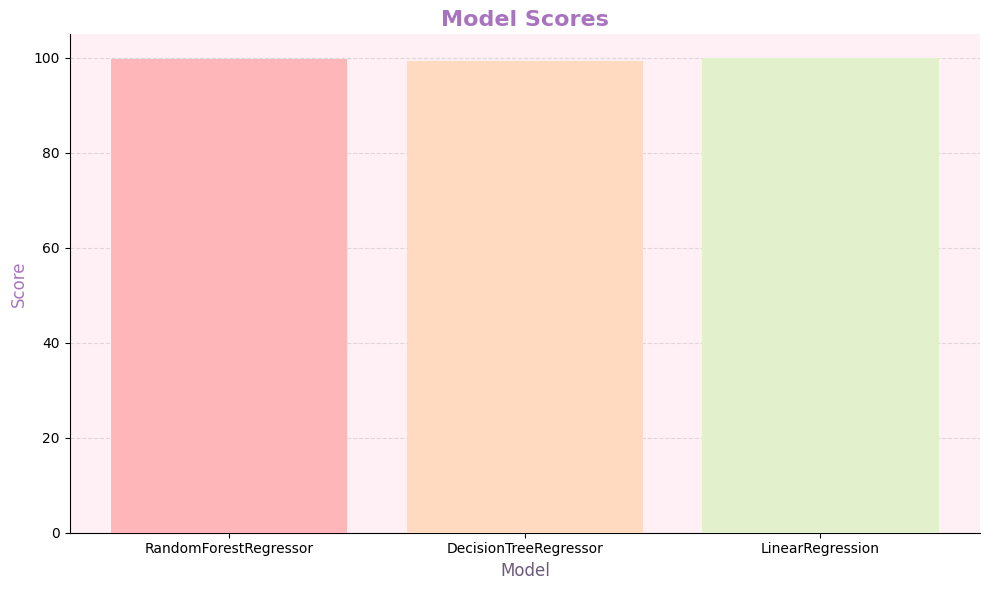

In [23]:
import matplotlib.pyplot as plt
#sample data for demonstration (replace with your  actual'errors'dictionary)
#define a cute pastel color palatte
cute_colors=['#FFB6B9','#FFDAC1','#E2F0CB','#B5EAD7','#C7CEEA']

#create the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(error.keys(),error.values(),color=cute_colors[:len(error)])

#add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

#add labels and title with cute fonts
plt.title('Model Scores',fontsize=16,fontweight='bold',color='#A974BF')
plt.xlabel('Model',fontsize=12,color='#6C5B7B')
plt.ylabel('Score',fontsize=12,color='#A974BF')

# Set background color
plt.gca().set_facecolor('#FFF0F5') # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Access the preprocessor from the existing pipeline
# preprocessor = model_pipeline.named_steps['preprocessor']

# Preprocess the training and testing data
# X_train_processed = preprocessor.transform(X_train)
# X_test_processed = preprocessor.transform(X_test)


# The following code is for classification tasks and is not suitable for
# predicting the continuous 'total_amount' in this regression problem.
# Attempting to run this code will result in a ValueError.

# # Train Logistic Regression
# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train_processed, y_train)

# # Predict probabilities and classes
# y_pred_prob = logreg.predict_proba(X_test_processed)[:, 1]
# y_pred_class = (y_pred_prob >= 0.5).astype(int)

# # Compute metrics
# accuracy = accuracy_score(y_test, y_pred_class)
# roc_auc = roc_auc_score(y_test, y_pred_prob)
# cm = confusion_matrix(y_test, y_pred_class)

# # Print metrics
# print("Classification Report:")
# print(classification_report(y_test, y_pred_class, target_names=['hadron', 'gamma']))
# print(f"Accuracy: {accuracy:.4f}")
# print(f"ROC-AUC: {roc_auc:.4f}")

# # Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.figure(figsize=(6,5))
# plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
# plt.plot([0,1], [0,1], 'k--')  # random classifier line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
# plt.figure(figsize=(6,5))
# plt.plot(recall, precision, label='Logistic Regression')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()

print("This cell has been modified to remove classification code which is not suitable for your regression problem.")

This cell has been modified to remove classification code which is not suitable for your regression problem.
